In [1]:
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd
# from scipy.signal import stft, periodogram
from scipy import signal, fft
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, welch, lfilter
import scipy.signal

# import tensorflow as tf
import librosa.display
import soundfile
import wave
import IPython.display as ipd

from scipy.io.wavfile import write

# import noisereduce as nr


In [2]:
signal, sampling_rate = librosa.load('/Users/sehwan/Desktop/datasets/bowel_sound/obowel_sound2.wav')

/var/folders/_9/pgqcwl9j27v5p1f9b293n1vc0000gn/T/ipykernel_15837/2559988425.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sampling_rate = librosa.load('/Users/sehwan/Desktop/datasets/bowel_sound/obowel_sound2.wav')
/Users/sehwan/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [3]:
sampling_rate, len(signal), len(signal)//sampling_rate

(22050, 5496320, 249)

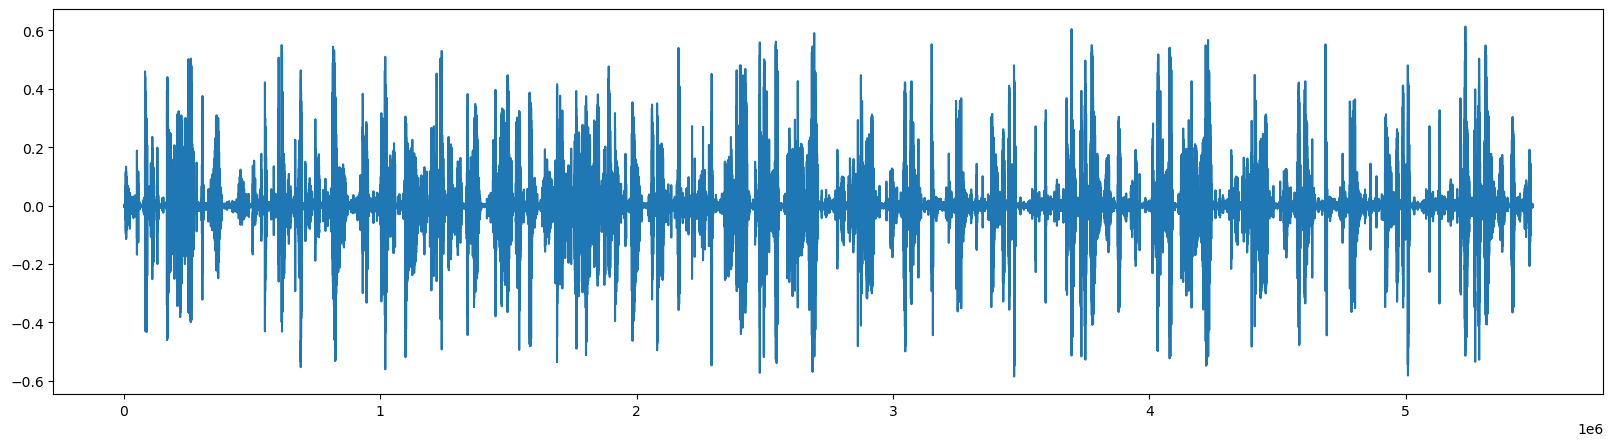

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(signal)

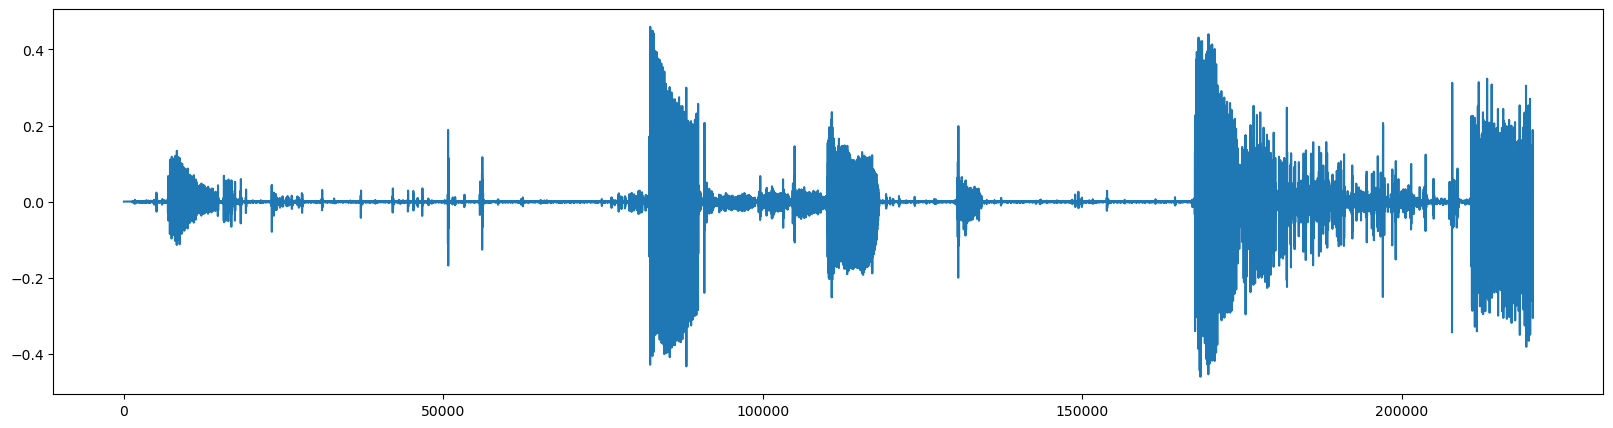

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(signal[:10*sampling_rate])

In [6]:
import numpy as np
from IPython.display import Audio

audio = Audio(signal[:3*sampling_rate], rate=sampling_rate)
display(audio)

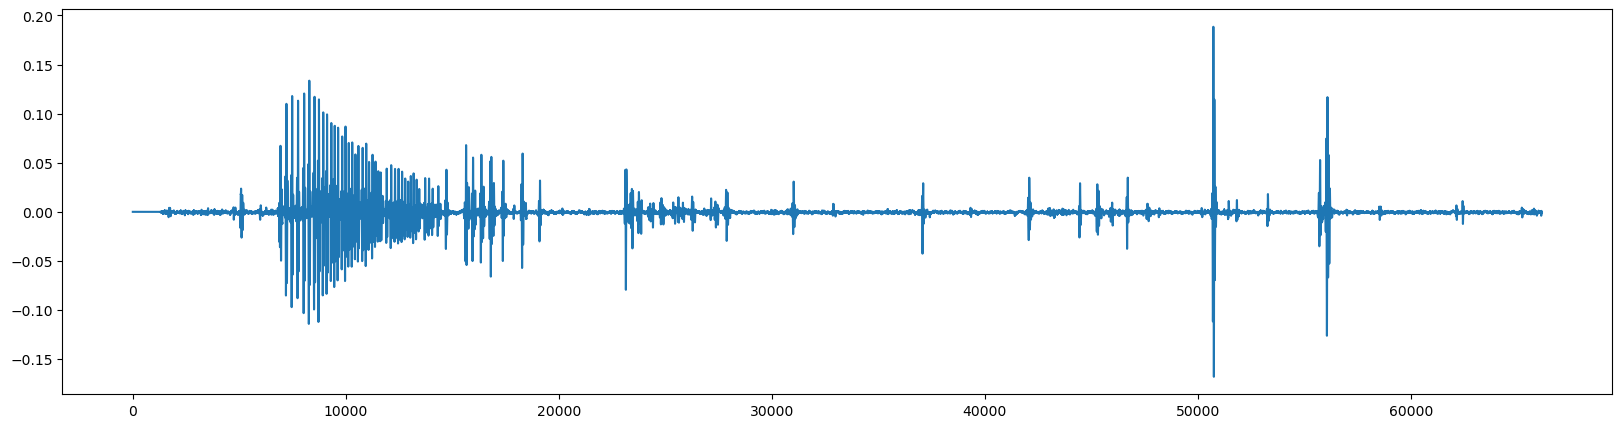

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(signal[:3*sampling_rate])

In [8]:
def cosine_similarity(x, y):
    return np.dot(x, y)/(np.sqrt(np.dot(x, x))*np.sqrt(np.dot(y, y)))

In [12]:
sampling_rate, sampling_rate*5

(22050, 110250)

In [17]:
target_signal = signal[:sampling_rate*5]
target_signal

array([ 1.5631940e-13,  4.4764192e-13, -1.8829382e-13, ...,
       -1.6693486e-01, -1.4847100e-01, -1.2473643e-01], dtype=float32)

In [18]:
bowel_signals = []
for ii in range(1, len(signal) // (sampling_rate*5)):
    start = ii * sampling_rate * 5
    end = (ii+1) * sampling_rate * 5
    
    # print(start)
    # print(end)
    # print('-' * 20)
    
    bowel_signals.append(signal[start:end])
    


In [19]:
len(bowel_signals)

48

In [22]:
target_signal = (target_signal - target_signal.min()) / (target_signal.max() - target_signal.min())
cos_similarities = []
for sig in bowel_signals:
    sig = (sig - sig.min()) / (sig.max() - sig.min())    
    cos_similarity = cosine_similarity(sig, target_signal)
    
    # print(cos_similarity)
    cos_similarities.append(cos_similarity)